## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Yarin 6857
# student 2: Lior 3826


## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
#imports libraries 
import warnings 

import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)
#load the dataset as train and test
#returns a dataframe of train and test

def load_dataset(file_train , file_test):
    df_train = pd.read_csv(file_train)
    df_test = pd.read_csv(file_test)
    return df_train,df_test

In [4]:
file_train = "wine_train.csv"
file_test = "wine_test.csv"
df_train,df_test = load_dataset(file_train , file_test)

In [5]:
df_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [6]:
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [7]:
#EDA_1 - Summary statistics
df_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [8]:
#EDA_2 - pearson coefficient:
df_train.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


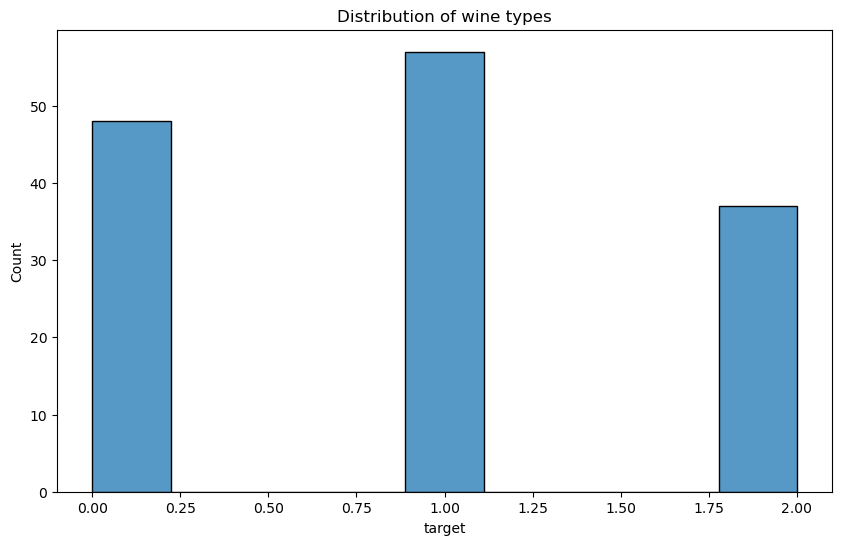

In [9]:
#EDA_3 - histogram about distribution of wine types
plt.figure(figsize=(10, 6))
sns.histplot(df_train['target'])
plt.title('Distribution of wine types')
plt.show()

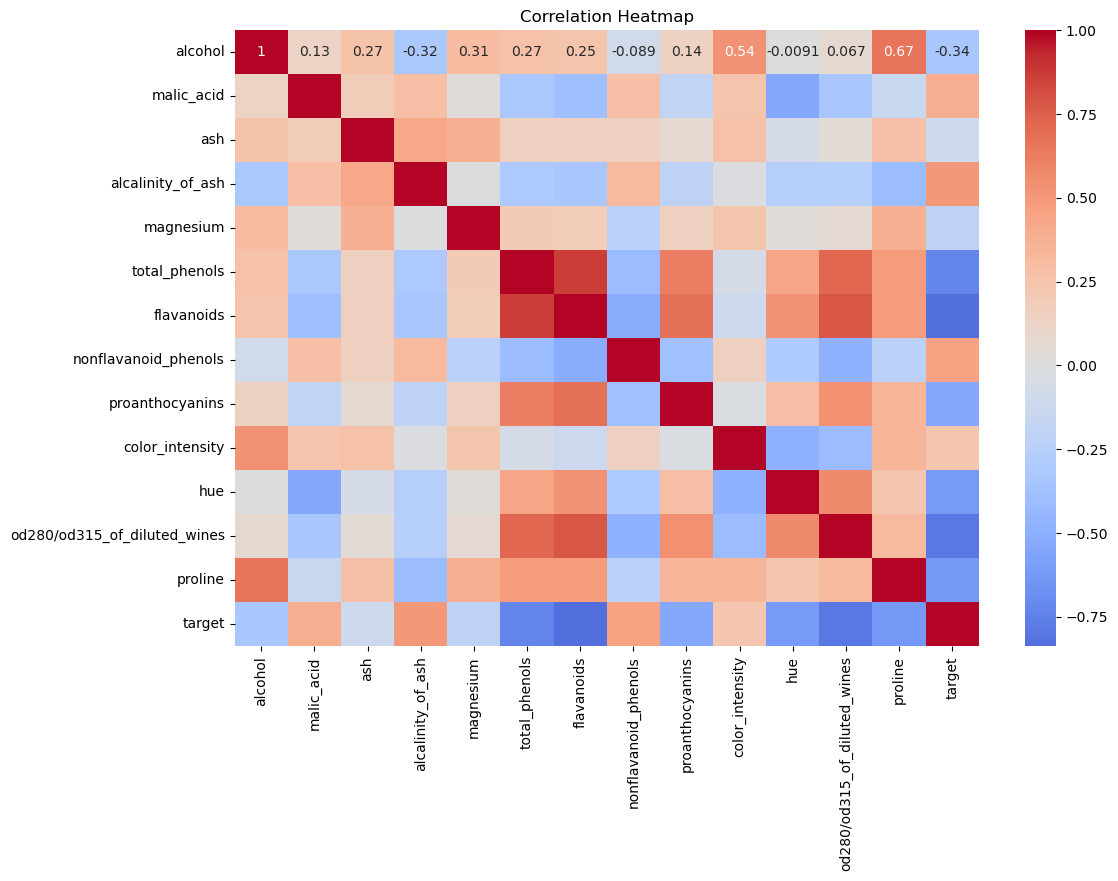

In [10]:
#EDA_4 - heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

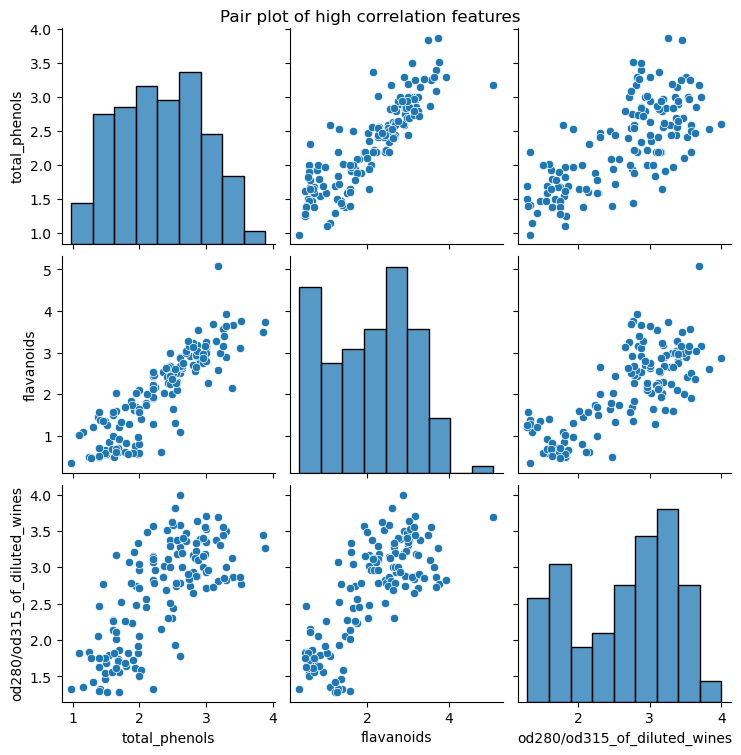

In [11]:
#EDA_5 - pair plot between high correlation features
correlationFeatures = ['total_phenols','flavanoids', "od280/od315_of_diluted_wines"]
sns.pairplot(df_train[correlationFeatures])
plt.suptitle('Pair plot of high correlation features',y=1)
plt.show()

In [12]:
# Testing feature engineering 

# Separate features and target
x_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
x_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

In [13]:
# Create pipelines for both classifiers
pipeline_dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca',PCA(n_components=7)),
    ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42))
])

pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca',PCA(n_components=7)),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

In [14]:
# Train the classifiers using the pipelines
pipeline_dt.fit(x_train, y_train)
pipeline_knn.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=7)),
                ('classifier', KNeighborsClassifier(weights='distance'))])

In [15]:
# Predict the labels for the test set using the pipelines
y_pred_dt = pipeline_dt.predict(x_test)
y_pred_knn = pipeline_knn.predict(x_test)

In [16]:
# Evaluate the classifiers
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [17]:
# Print the classification reports
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_dt:.2f}")

print("\nK-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_knn:.2f}")

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.97

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.79      0.88        14
           2       0.92      1.00      0.96        11

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36

Accuracy: 0.92


In [18]:
#train base on the first experiment

# scaling: Minmax , Standard
preprocessing_options = [
    ('minmax', MinMaxScaler()),
    ('standard', StandardScaler())
]

# PCA : None, 2, 5, 7  
pca_options = [
    ('pca_none' , PCA(n_components = None)),
    ('pca_2' , PCA(n_components = 2)),
    ('pca_5' , PCA(n_components = 5)),
    ('pca_7' , PCA(n_components = 7))
]
 
# Algorithms: KNN , Decision tree
models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

In [19]:
# Hyper parameters for each Algorithm
param_grid = {
    'decision_tree':{
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    },
    'knn':{
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan','chebyshev']
    },
}

In [20]:
all_combinations = []
results = []

for model_name, model in models:
    for preprocessing_name, preprocessing in preprocessing_options:
        for pca_name, pca in pca_options:
            pipe = Pipeline([
                ('preprocessing', preprocessing),
                ('pca' , pca),
                ('model', model)
            ])
        
            # Perform 5-fold cross-validation on the training data
            grid = GridSearchCV(pipe, param_grid[model_name], cv=5, scoring=make_scorer(f1_score, average='macro'))
            grid.fit(x_train, y_train)
        
            # Storing all combinations
            for i in range(len(grid.cv_results_['params'])):
                all_combinations.append({
                    'model': model_name,
                    'preprocessing': preprocessing_name,
                    'pca':pca_name,
                    'params': grid.cv_results_['params'][i],
                    'score': grid.cv_results_['mean_test_score'][i].round(4)
                })
        
            # Storing the best results
            results.append({
                'model': model_name,
                'preprocessing': preprocessing_name,
                'pca':pca_name,
                'best_params': grid.best_params_,
                'best_score': grid.best_score_.round(4)
            })

In [21]:
#show all the results
all_combinations_df = pd.DataFrame(all_combinations)
all_combinations_df

,model,preprocessing,pca,params,score
0,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9304
1,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9295
2,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9434
3,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9434
4,decision_tree,minmax,pca_none,"{'model__max_depth': 3, 'model__min_samples_le...",0.9283
...,...,...,...,...,...
355,knn,standard,pca_7,"{'model__metric': 'chebyshev', 'model__n_neigh...",0.9389
356,knn,standard,pca_7,"{'model__metric': 'chebyshev', 'model__n_neigh...",0.9592
357,knn,standard,pca_7,"{'model__metric': 'chebyshev', 'model__n_neigh...",0.9592
358,knn,standard,pca_7,"{'model__metric': 'chebyshev', 'model__n_neigh...",0.9592


In [22]:
#show the best results

#Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Expand the 'best_params' dictionary into separate columns
best_params_df = results_df['best_params'].apply(pd.Series)

# Concatenate the expanded params with the original DataFrame
results_df_expanded = pd.concat([results_df.drop(columns=['best_params']), best_params_df], axis=1)


#show the 5 best results
results_df_expanded.tail()

,model,preprocessing,pca,best_score,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__metric,model__n_neighbors,model__weights
11,knn,minmax,pca_7,0.9736,NaN,NaN,NaN,manhattan,3.0,uniform
12,knn,standard,pca_none,0.9644,NaN,NaN,NaN,euclidean,7.0,distance
13,knn,standard,pca_2,0.9729,NaN,NaN,NaN,euclidean,5.0,uniform
14,knn,standard,pca_5,0.9587,NaN,NaN,NaN,chebyshev,7.0,distance
15,knn,standard,pca_7,0.9643,NaN,NaN,NaN,euclidean,7.0,uniform


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [23]:
# Get the preprocessing transformer and model object associated with the best model
best_model = results_df.loc[results_df['best_score'].idxmax()]
best_preprocessing = dict(preprocessing_options)[best_model['preprocessing']]
best_pca = dict(pca_options)[best_model['pca']]
best_model_obj = dict(models)[best_model['model']]

In [24]:
best_pipe = Pipeline([
    ('preprocessing', best_preprocessing),
    ('pca',best_pca),
    ('model', best_model_obj)
])

In [25]:
# Set parameters of the best pipeline based on the best_params found during GridSearchCV
best_pipe.set_params(**best_model['best_params'])

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', KNeighborsClassifier(metric='euclidean'))])

In [26]:
# Fit the best pipeline on the training data
best_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', KNeighborsClassifier(metric='euclidean'))])

## Part 4 - Apply on test and show model performance estimation

In [27]:
# Predict on the test set using the entire pipeline
y_pred = best_pipe.predict(x_test)

In [28]:
# Check the predictions
print("Predictions on the test set:")
y_pred_df = pd.DataFrame({
    'Target': y_test,
   'Predicted': y_pred
})
y_pred_df

Predictions on the test set:


,Target,Predicted
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2
5,1,1
6,0,0
7,1,1
8,1,0
9,1,1


In [29]:
# Calculate F1-macro score on the test set using predictions from the best pipeline
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-macro score of the best model on test set: {f1:.2f}")
print(f"Best Model: {best_model_obj}")
print(f"Best Preprocessing: {best_preprocessing}")
print(f"Best PCA: {best_pca}")

F1-macro score of the best model on test set: 0.97
Best Model: KNeighborsClassifier(metric='euclidean')
Best Preprocessing: MinMaxScaler()
Best PCA: PCA(n_components=2)


In [30]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

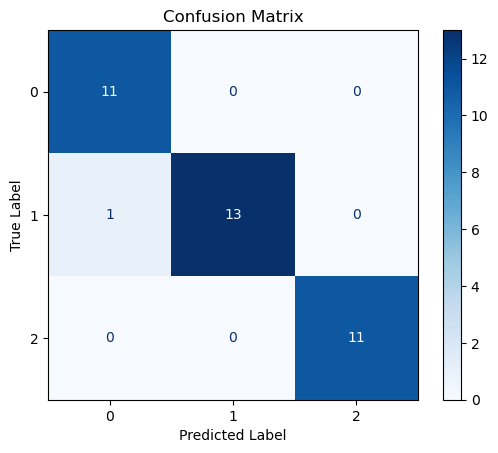

In [31]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipe.named_steps['model'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()